# Player Analysis

In [334]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data Cleaning and Exploration

In [335]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [336]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [337]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 24)

In [338]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,2,0,0,0,0,2,2,NaN,NaN


## Taking in consideration only CSK VS RR matches

In [339]:
CSK_RR =matches[np.logical_or(np.logical_and(matches['team1']=='Chennai Super Kings',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Chennai Super Kings',matches['team1']=='Rajasthan Royals'))]

CSK_RR.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
19341,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,Sohail Tanvir,0,0,0,0,0,0,0,PA Patel,lbw
19342,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,Sohail Tanvir,0,0,0,0,0,0,0,NaN,NaN
19343,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,Sohail Tanvir,0,0,0,0,1,0,1,NaN,NaN
19344,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,Sohail Tanvir,0,0,0,0,0,0,0,NaN,NaN
19345,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,Sohail Tanvir,0,0,0,0,0,0,0,SP Fleming,lbw


In [340]:
CSK_RR.match_id.nunique()

21

## Analysis of Runs RR is expected to score in first 6 overs


In [341]:
powerplay = CSK_RR[CSK_RR["over"]<=6]
powerplay = powerplay[powerplay["batting_team"]=="Rajasthan Royals"]

powerplay.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
19457,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN
19458,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN
19459,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN
19460,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN
19461,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN


In [342]:
powerplay.match_id.nunique()

21

In [343]:
count = powerplay.match_id.nunique()

RR_powerplay_overall = powerplay.total_runs.sum()

Avg_score = RR_powerplay_overall/count

print("On an average runs scored by RR in powerplay :",round(Avg_score))

On an average runs scored by RR in powerplay : 46.0


### Inning wise

In [344]:
total_inning_wise_powerplay = pd.DataFrame(powerplay.groupby(["inning"])["total_runs"].sum())

total_inning_wise_powerplay

,total_runs
inning,
1,432
2,525


In [345]:
print("Inning wise run scored by RR in powerplay :")

pd.DataFrame(powerplay.groupby(["inning","match_id"])["total_runs"].sum())

Inning wise run scored by RR in powerplay :


total_runs
inning match_id            
1      110               67
       152               34
       198               58
       276               47
       334               41
       361               28
       410               55
       494               42
       11316             60
2      83                44
       117               41
       137               38
       206               62
       285               48
       442               24
       467               38
       533               47
       563               40
       7910              37
       7936              58
       11148             48

### First inning average score calcluation

In [346]:
first_inning = powerplay[powerplay["inning"]==1]

first_inning.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
25420,110,2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,Rajasthan Royals,1,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,1,0,1,NaN,NaN
25421,110,2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,Rajasthan Royals,1,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN
25422,110,2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,Rajasthan Royals,1,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,1,0,1,1,NaN,NaN
25423,110,2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,Rajasthan Royals,1,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,6,0,6,NaN,NaN
25424,110,2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,Rajasthan Royals,1,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,4,0,0,4,4,NaN,NaN


In [347]:
first_inning_runs = pd.DataFrame(first_inning.groupby(["season","match_id"])["total_runs"].sum())

first_inning_runs

total_runs
season match_id            
2008   110               67
2009   152               34
2010   198               58
2011   276               47
2012   334               41
       361               28
2013   410               55
2014   494               42
2019   11316             60

In [348]:
count = first_inning.match_id.nunique()

Total_runs_scored = first_inning_runs.total_runs.sum()

Avg_score = Total_runs_scored/count

print("On an average runs scored by RR in 1st inning powerplay :",round(Avg_score))

On an average runs scored by RR in 1st inning powerplay : 48.0


### Second inning average score calcluation

In [349]:
second_inning = powerplay[powerplay["inning"]==2]

second_inning.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
19457,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN
19458,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN
19459,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN
19460,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN
19461,83,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,2,Rajasthan Royals,Chennai Super Kings,...,M Ntini,0,0,0,0,0,0,0,NaN,NaN


In [350]:
second_inning_runs = pd.DataFrame(second_inning.groupby(["season","match_id"])["total_runs"].sum())

second_inning_runs

total_runs
season match_id            
2008   83                44
       117               41
2009   137               38
2010   206               62
2011   285               48
2013   442               24
2014   467               38
2015   533               47
       563               40
2018   7910              37
       7936              58
2019   11148             48

In [351]:
count = second_inning.match_id.nunique()

Total_runs_scored = second_inning_runs.total_runs.sum()

Avg_score = Total_runs_scored/count

print("On an average runs scored by RR in 2nd inning powerplay :",round(Avg_score))

On an average runs scored by RR in 2nd inning powerplay : 44.0


## Confidence Interval

In [240]:
match_wise_powerplay = pd.DataFrame(powerplay.groupby(["match_id"])["total_runs"].sum())

match_wise_powerplay.columns = ["Powerplay Runs"]

match_wise_powerplay

,Powerplay Runs
match_id,
83,44
110,67
117,41
137,38
152,34
198,58
206,62
276,47
285,48


In [356]:
match_wise_powerplay.describe().T

,count,mean,std,min,25%,50%,75%,max
Powerplay Runs,21.0,45.571429,11.258647,24.0,38.0,44.0,55.0,67.0


In [357]:
mean = match_wise_powerplay["Powerplay Runs"].mean()
sd = match_wise_powerplay["Powerplay Runs"].std()
n = len(match_wise_powerplay)

n

21

In [358]:
tstar = 2.064
se = sd/np.sqrt(n)
se

2.4568382978471965

In [359]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for Total Runs that RR can score in powerplay today :{}".format((lcb, ucb)))

95% Confidence Interval for Total Runs that RR can score in powerplay today :(41.0, 51.0)


## Analysis of wickets Archer is expected to take in death overs

In [246]:
death = CSK_RR[(CSK_RR["over"]>15) & (CSK_RR["over"]<=20)]

In [247]:
death.over.unique()

array([16, 17, 18, 19, 20], dtype=int64)

In [248]:
archer = death[death["bowler"]=='J Archer']

archer.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
160544,7936,2018,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,J Archer,0,0,0,0,1,0,1,NaN,NaN
160545,7936,2018,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,J Archer,0,0,0,0,1,0,1,NaN,NaN
160546,7936,2018,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,J Archer,1,0,0,0,1,1,2,NaN,NaN
160547,7936,2018,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,J Archer,0,0,0,0,2,0,2,NaN,NaN
160548,7936,2018,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,1,Chennai Super Kings,Rajasthan Royals,...,J Archer,0,0,0,0,1,0,1,NaN,NaN


In [249]:
archer.over.unique()

array([17, 19], dtype=int64)

In [360]:
against_CSK = pd.DataFrame(archer.groupby(["season","match_id"])["player_dismissed"].count())

against_CSK.columns = ["Wicket taken"]

print("Wickets taken by J Archer in death against CSK :")

against_CSK

Wickets taken by J Archer in death against CSK :


Wicket taken
season match_id              
2018   7936                 0
2019   11148                1
       11316                0

From the above analysis we can't get much information due to very small sample size but we saw that in past 2 years he has played 3 matches against CSK and have taken wicket in 1 match only in death.

For better idea of his performance in death over we need to analyse a larger sample . So , we would consider his bowling performance against all the teams

In [361]:
death_overall = matches[(matches["over"]>15) & (matches["over"]<=20)]

In [362]:
jofra = death_overall[death_overall["bowler"]=='J Archer']
jofra.match_id.nunique()

20

In [363]:
jofra.over.unique()

array([17, 19, 18, 20, 16], dtype=int64)

In [364]:
against_all = pd.DataFrame(jofra.groupby(["season","match_id"])["player_dismissed"].count())

against_all.columns = ["Wicket taken"]

print("Wickets taken by J Archer in death against all :")

against_all

Wickets taken by J Archer in death against all :


Wicket taken
season match_id              
2018   7914                 3
       7921                 3
       7925                 1
       7931                 0
       7933                 0
       7936                 0
       7940                 0
       7942                 0
       7946                 0
       7951                 0
2019   11140                0
       11144                0
       11148                1
       11150                1
       11316                0
       11318                2
       11323                2
       11327                1
       11331                0
       11334                0

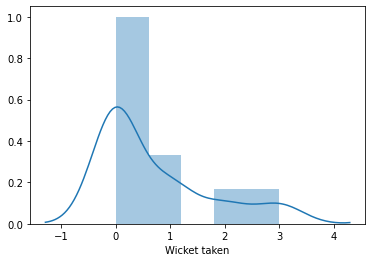

In [365]:
sns.distplot(against_all['Wicket taken'])

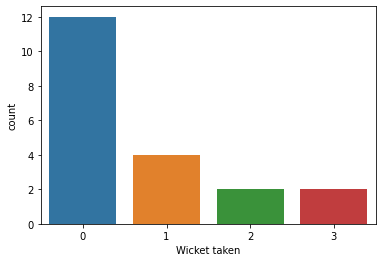

In [366]:
sns.countplot(against_all['Wicket taken'])

From the above plots we can see a right skewed symmetry in the data which shows the uncertainity in wickets and also with a peak value at 0.

In [257]:
print("Average no of wickets taken by Archer in death over(overall) :",round(against_all["Wicket taken"].mean()))

Average no of wickets taken by Archer in death over(overall) : 1


From all the above analysis of matches against CSK and overall we can observe that majority of times he has 0 wickets and on an average he took 1 wicket in death overs.

So from all these information and considering his latest form also we can predict Jofra Archer to take 1-2 wickets in death overs. 

### Analysis of strike rate with which Steven Smith is expected to play 

Since , CSK do not undergo many changes in their playing XI so considering only those matches where Steven Smith (as a part of RR) has played against CSK. 

In [380]:
smith = CSK_RR[(CSK_RR["batting_team"]=="Rajasthan Royals") &(CSK_RR["batsman"]=='SPD Smith')]

In [381]:
smith.iloc[41:,2:].head()

,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
167584,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,4,3,...,SN Thakur,0,0,0,0,4,0,4,NaN,NaN
167585,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,4,4,...,SN Thakur,0,0,0,0,4,0,4,NaN,NaN
167586,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,4,5,...,SN Thakur,0,0,0,0,0,0,0,NaN,NaN
167587,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,4,6,...,SN Thakur,1,0,0,0,1,1,2,NaN,NaN
167588,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,4,7,...,SN Thakur,0,0,0,0,0,0,0,NaN,NaN


In [382]:
smith = smith[smith["wide_runs"]==0]

smith.iloc[41:,2:].head()

,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
167584,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,4,3,...,SN Thakur,0,0,0,0,4,0,4,NaN,NaN
167585,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,4,4,...,SN Thakur,0,0,0,0,4,0,4,NaN,NaN
167586,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,4,5,...,SN Thakur,0,0,0,0,0,0,0,NaN,NaN
167588,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,4,7,...,SN Thakur,0,0,0,0,0,0,0,NaN,NaN
167594,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,5,6,...,DL Chahar,0,0,0,0,1,0,1,NaN,NaN


In [383]:
strike = smith.groupby(["season","match_id","batsman"]).agg({ "batsman_runs":"sum","ball" : 'count'})

print("Runs scored by Smith against CSK :")

strike

Runs scored by Smith against CSK :


batsman_runs  ball
season match_id batsman                      
2014   467      SPD Smith            19    20
       494      SPD Smith             9     8
2015   533      SPD Smith             6     7
       563      SPD Smith             4     6
2019   11148    SPD Smith            28    30
       11316    SPD Smith            15    22

In [384]:
strike_rate = pd.DataFrame(strike['batsman_runs']/strike["ball"] * 100)

strike_rate.columns = ["strike rate"]

print("Strike Rate of Smith while batting against CSK :")

strike_rate

Strike Rate of Smith while batting against CSK :


strike rate
season match_id batsman               
2014   467      SPD Smith    95.000000
       494      SPD Smith   112.500000
2015   533      SPD Smith    85.714286
       563      SPD Smith    66.666667
2019   11148    SPD Smith    93.333333
       11316    SPD Smith    68.181818

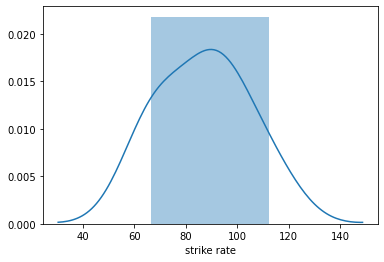

In [385]:
sns.distplot(strike_rate['strike rate'])

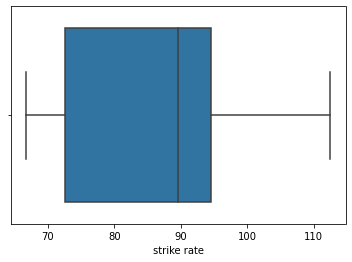

In [386]:
sns.boxplot(strike_rate['strike rate'])

In [387]:
print("Average strike rate of Smith against CSK :",round(strike_rate['strike rate'].mean()))

Average strike rate of Smith against CSK : 87


## Confidence Interval Calculation

In [388]:
strike_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
strike rate,6.0,86.899351,17.455783,66.666667,72.564935,89.52381,94.583333,112.5


In [389]:
mean = strike_rate['strike rate'].mean()
sd = strike_rate['strike rate'].std()
n = len(strike_rate['strike rate'])

n

6

In [390]:
tstar = 2.064
se = sd/np.sqrt(n)
se

7.126293571395718

In [391]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the strike rate with which Smith can score today against CSK :{}".format((lcb, ucb)))

95% Confidence Interval for the strike rate with which Smith can score today against CSK :(72.0, 102.0)


## Deepak Chahar Economy Rate

- Against RR

In [393]:
chahar = CSK_RR[(CSK_RR["bowling_team"]=="Chennai Super Kings") &(CSK_RR["bowler"]=='DL Chahar')]
chahar = chahar[(chahar["bye_runs"]==0) & (chahar["legbye_runs"]==0)]
chahar.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
154358,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,1,1,AM Rahane,H Klaasen,DL Chahar,1,0,0,0,1,1,2,NaN,NaN
154359,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,1,2,AM Rahane,H Klaasen,DL Chahar,0,0,0,0,1,0,1,NaN,NaN
154360,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,1,3,H Klaasen,AM Rahane,DL Chahar,0,0,0,0,0,0,0,NaN,NaN
154361,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,1,4,H Klaasen,AM Rahane,DL Chahar,0,0,0,0,1,0,1,NaN,NaN
154362,Rajasthan Royals,field,Chennai Super Kings,2,Rajasthan Royals,Chennai Super Kings,1,5,AM Rahane,H Klaasen,DL Chahar,0,0,0,0,0,0,0,NaN,NaN


In [394]:
economy = chahar.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique' , 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for Chahar against RR :")

economy

Bowling stats for Chahar against RR :


runs given  over  wickets taken
season match_id bowler                                    
2018   7910     DL Chahar          30     4              2
2019   11148    DL Chahar          19     4              2
       11316    DL Chahar          33     4              2

In [395]:
economy_rate = pd.DataFrame(economy['runs given']/economy["over"])

economy_rate.columns = ["economy rate"]

print("Economy Rate of Chahar while bowling against RR :")

economy_rate

Economy Rate of Chahar while bowling against RR :


economy rate
season match_id bowler                 
2018   7910     DL Chahar          7.50
2019   11148    DL Chahar          4.75
       11316    DL Chahar          8.25

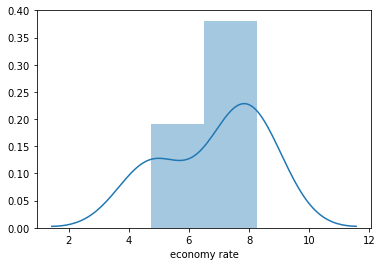

In [396]:
sns.distplot(economy_rate["economy rate"])

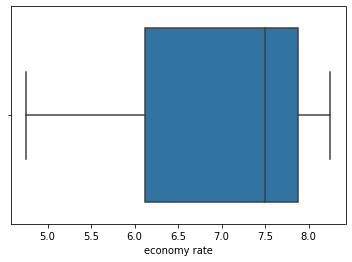

In [397]:
sns.boxplot(economy_rate["economy rate"])

In [398]:
print("Average economy rate of Chahar while bowling against RR :",round(economy_rate["economy rate"].mean()))

Average economy rate of Chahar while bowling against RR : 7


- Overall 

In [303]:
chahar_overall = matches[(matches["bowling_team"]=="Chennai Super Kings") &(matches["bowler"]=='DL Chahar')]
chahar_overall = chahar_overall[(chahar_overall["bye_runs"]==0) & (chahar_overall["legbye_runs"]==0)]
chahar_overall.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
150460,Chennai Super Kings,field,Chennai Super Kings,1,Mumbai Indians,Chennai Super Kings,1,1,RG Sharma,E Lewis,DL Chahar,0,0,0,0,0,0,0,NaN,NaN
150461,Chennai Super Kings,field,Chennai Super Kings,1,Mumbai Indians,Chennai Super Kings,1,2,RG Sharma,E Lewis,DL Chahar,0,0,0,0,0,0,0,NaN,NaN
150462,Chennai Super Kings,field,Chennai Super Kings,1,Mumbai Indians,Chennai Super Kings,1,3,RG Sharma,E Lewis,DL Chahar,0,0,0,0,0,0,0,NaN,NaN
150463,Chennai Super Kings,field,Chennai Super Kings,1,Mumbai Indians,Chennai Super Kings,1,4,RG Sharma,E Lewis,DL Chahar,0,0,0,0,4,0,4,NaN,NaN
150464,Chennai Super Kings,field,Chennai Super Kings,1,Mumbai Indians,Chennai Super Kings,1,5,RG Sharma,E Lewis,DL Chahar,0,0,0,0,1,0,1,NaN,NaN


In [399]:
economy_overall = chahar_overall.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique' , 'player_dismissed':'count'})

economy_overall.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for Chahar overall :")

economy_overall

Bowling stats for Chahar overall :


runs given  over  wickets taken
season match_id bowler                                    
2018   7894     DL Chahar          14     3              1
       7898     DL Chahar          18     1              0
       7905     DL Chahar          37     3              0
       7910     DL Chahar          30     4              2
       7913     DL Chahar          15     4              3
       7917     DL Chahar          20     2              0
       7920     DL Chahar          19     3              0
       7939     DL Chahar          16     4              1
       7945     DL Chahar          23     3              1
       7949     DL Chahar          30     4              1
       7950     DL Chahar          31     4              1
       7953     DL Chahar          25     4              0
2019   11137    DL Chahar          17     4              0
       11141    DL Chahar          20     4              1
       11148    DL Chahar          19     4              2
       11151    DL Chahar          21     3              1
       11309    DL Chahar          40     4              1
       11314    DL Chahar          20     4              3
       11316    DL Chahar          33     4              2
       11320    DL Chahar          36     4              0
       11324    DL Chahar          31     3              1
       11330    DL Chahar          25     4              2
       11332    DL Chahar          30     4              1
       11335    DL Chahar          46     4              1
       11341    DL Chahar          32     3              1
       11346    DL Chahar          28     4              0
       11412    DL Chahar          30     4              1
       11414    DL Chahar          28     4              2
       11415    DL Chahar          26     4              3

In [400]:
economy_rate_overall = pd.DataFrame(economy_overall['runs given']/economy_overall["over"])

economy_rate_overall.columns = ["economy rate"]

print("Economy Rate of Chahar while bowling (overall) :")

economy_rate_overall

Economy Rate of Chahar while bowling (overall) :


economy rate
season match_id bowler                 
2018   7894     DL Chahar      4.666667
       7898     DL Chahar     18.000000
       7905     DL Chahar     12.333333
       7910     DL Chahar      7.500000
       7913     DL Chahar      3.750000
       7917     DL Chahar     10.000000
       7920     DL Chahar      6.333333
       7939     DL Chahar      4.000000
       7945     DL Chahar      7.666667
       7949     DL Chahar      7.500000
       7950     DL Chahar      7.750000
       7953     DL Chahar      6.250000
2019   11137    DL Chahar      4.250000
       11141    DL Chahar      5.000000
       11148    DL Chahar      4.750000
       11151    DL Chahar      7.000000
       11309    DL Chahar     10.000000
       11314    DL Chahar      5.000000
       11316    DL Chahar      8.250000
       11320    DL Chahar      9.000000
       11324    DL Chahar     10.333333
       11330    DL Chahar      6.250000
       11332    DL Chahar      7.500000
       11335    DL Chahar     11.500000
       11341    DL Chahar     10.666667
       11346    DL Chahar      7.000000
       11412    DL Chahar      7.500000
       11414    DL Chahar      7.000000
       11415    DL Chahar      6.500000

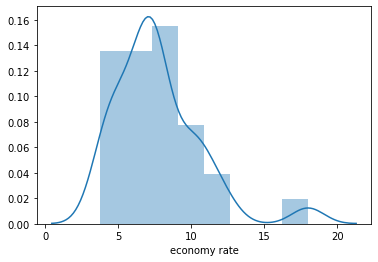

In [401]:
sns.distplot(economy_rate_overall["economy rate"])

In [404]:
print("Average economy rate of Chahar while bowling (overall):",round(economy_rate_overall["economy rate"].mean()))

Average economy rate of Chahar while bowling (overall): 8


## Confidence Interval Calculation

In [405]:
economy_rate_overall.describe().T

,count,mean,std,min,25%,50%,75%,max
economy rate,29.0,7.698276,3.006723,3.75,6.25,7.5,9.0,18.0


In [406]:
mean = economy_rate_overall["economy rate"].mean()
sd = economy_rate_overall["economy rate"].std()
n = len(economy_rate_overall["economy rate"])

n

29

In [407]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.5583344636581372

In [408]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the economy rate by which Chahar is expected to be bowling in this match :{}".format((lcb, ucb)))

95% Confidence Interval for the economy rate by which Chahar is expected to be bowling in this match :(7.0, 9.0)
